In [1]:
# Fuseki IO Development V
## Refinement

# Attach dir one above to handle IDE subdir
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import repository
from rdflib import URIRef, Graph, Namespace


import pandas as pd
import html
import io
import pydotplus
from rdflib.tools.rdf2dot import rdf2dot
from IPython.display import display, Image

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MappingMetaTarget belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, owl.topObjectProperty]; I'm trying to fix it...
* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /home/tomk/environment/devpy/lib/python3.10/site-packages/owlready2/hermit:/home/tomk/environment/devpy/lib/python3.10/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////tmp/tmpy84y5uwz


Serialization.Meta [Serialization.SerializationMetaData]
Serialization.TranslationMapping [Serialization.SerializationSpecs]
Serialization.MappingKVPair [Serialization.SerializationSpecs]
Serialization.Serialization [Serialization.SerializationSpecs]
Serialization.Mapping [Serialization.SerializationSpecs]
Serialization.BatchDefinition [Serialization.SerializationSpecs]
Serialization.SerializationSpecs [Serialization.SerializationMetaData]
Serialization.BatchNode [Serialization.DataLoad]
Serialization.DataLoad [Serialization.SerializationMetaData]
Serialization.SerializationMetaData [owl.Thing]
Serialization.DataPropertyMapping [Serialization.Mapping]
Serialization.MetaDataProperty [Serialization.Meta]
Serialization.EntityMapping [Serialization.Mapping]
Serialization.MetaClass [Serialization.Meta]
Serialization.JobNode [Serialization.DataLoad]
Serialization.MetaProperty [Serialization.Meta]
Serialization.MetaStaticProperty [Serialization.Meta]
Serialization.PropertyMapping [Serializati

* Owlready2 * HermiT took 0.6229386329650879 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [2]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    print(stream.getvalue())
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g

def get_field(v):
    if isinstance(v,str):
        return html.escape(str(v))
    elif isinstance(v,(int, float)):
        if pd.isnull(v):
            return None
        else:
            return v
    elif v is None or isinstance(v,pd.Null):
        return None

In [3]:
repo = repository.Repository(store_type="memory")

In [4]:
discourse_details_sparql = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX disco: <http://www.semanticweb.org/tomk/ontologies/2022/11/discourse#> 
PREFIX dcterms: <http://purl.org/dc/terms/> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

select ?g ?discourse ?name ?title ?description ?created ?hash (COUNT(?declaration) as ?declarations) (COUNT(distinct ?psubject) as ?entities)

WHERE {
  GRAPH ?g
  {
      ?discourse a disco:Discourse.
      ?discourse dcterms:title ?title.
      ?discourse rdfs:label ?name.
      ?discourse dcterms:description ?description.
      ?discourse dcterms:created ?created .
      ?discourse disco:DiscourseHash ?hash .
      ?discourse disco:DiscourseContains+ ?declaration .
      ?declaration a disco:Declaration .
      ?posit_type rdfs:subPropertyOf* disco:Posits .
      ?declaration disco:Asserts ?assertion.
      ?assertion disco:Subject ?psubject.
  }
}
GROUP BY ?g ?discourse ?name ?title ?description ?created ?hash
"""

qr = repo.ds.query(discourse_details_sparql)

In [5]:
repo.get_discourse_hashes()

[]

In [6]:
repo.register_serialization("../sample_ser.rdf")

In [7]:
mpd = {"created" : "2023-08-17", 
       "creator" : "tomk", 
       "description" : "Test sample serialization", 
       "title" : "test3", 
       "modified" : "2023-04-10"}
metadata_payload = repo.meta_data_package_template( mpd )

datarows=[{"ParentClass" : "Y6AF", 
       "Class" : "Fred Kimber", 
       "SubClassPointer" : "b", 
       "Property" : "Sebastian", 
       "DataProperty" : "Cyan"},
      
       {"ParentClass" : "Y6AF", 
       "Class" : "Sebastian", 
       "SubClassPointer" : "c", 
       "Property" : "Manuel", 
       "DataProperty" : "Green"},
      
       {"ParentClass" : "Y6AF", 
       "Class" : "Manuel", 
       "SubClassPointer" : "a", 
       "Property" : "Fred Kimber", 
       "DataProperty" : "Red"}
]


repo.load_serialization_to_discourse("Sample Serialisation", mpd['title'], metadata_payload, datarows)

//////LOCATE1/////
0:00:00.008462 for 21 from 3
//////LOCATE2/////
self.members: 21
0:00:00.023499 for 282 triples


In [8]:
repo.get_discourse_hashes()

[('af757787414b-921e-c7dc-fac68562cdb8',
  'http://www.semanticweb.org/tomk/ontologies/2022/11/e75a94ad060d4103a6700fa0132b585d')]

In [9]:
repo.load_serialization_to_discourse("Sample Serialisation", mpd['title'], metadata_payload, datarows)

//////LOCATE1/////
0:00:00.008968 for 21 from 3
//////LOCATE2/////
self.members: 21
This data is already loaded! - Aborting


In [10]:
repo.load_serialization_to_discourse("Sample Serialisation", mpd['title'], metadata_payload, datarows)

//////LOCATE1/////
0:00:00.009928 for 21 from 3
//////LOCATE2/////
self.members: 21
This data is already loaded! - Aborting


In [11]:
repo.get_discourse_hashes()

[('af757787414b-921e-c7dc-fac68562cdb8',
  'http://www.semanticweb.org/tomk/ontologies/2022/11/e75a94ad060d4103a6700fa0132b585d')]

In [12]:
with open("../SPARQL/get_discourse_posits_parms_discourse_iris.sparql", "r") as f:
    sparql=f.read()

In [13]:
get_posits_sparql = sparql.replace("%%p1%%", URIRef(repo.get_discourse_hashes()[0][1]).n3())

In [14]:
get_posits_sparql

'PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\nPREFIX disco: <http://www.semanticweb.org/tomk/ontologies/2022/11/discourse#> \nPREFIX dcterms: <http://purl.org/dc/terms/> \nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> \n\nselect ?g ?discourse ?assertion ?refutation ?posit ?s ?p ?o\nWHERE {\n  GRAPH ?g\n  {\n      ?discourse a disco:Discourse.\n      ?discourse disco:DiscourseContains+ ?declaration .\n      ?declaration a disco:Declaration .\n        OPTIONAL { ?declaration disco:Asserts ?assertion. \n                   ?assertion disco:Subject ?s.\n                   ?assertion disco:Predicate ?p.\n                   ?assertion disco:Object ?o.\n                   }\n        OPTIONAL { ?declaration disco:Refutes ?refutation. \n                   ?refutation disco:Subject ?s.\n                   ?refutation disco:Predicate ?p.\n                   ?refutation disco:Object ?o.\n                   }\n        OPTIONAL { ?declaration disco:Posits ?posit. \n              

In [15]:
qr = repo.ds.query(get_posits_sparql)

In [16]:
results = list([{k:v[e] for e,k in enumerate([v.n3()[1:] for v in qr.vars])} for v in qr])
dcontents = pd.DataFrame(results)
dcontents['triple'] = dcontents.apply(lambda x : tuple([x['s'], x['p'], x['o']]), axis=1)
dcd = dcontents.groupby(['discourse'])['triple'].agg(set).to_dict()
s1 = list(dcd.values())[0]

In [17]:
s1

{(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/10011408cd4845fbbc921d6814818708'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'),
  rdflib.term.Literal('Y6AF')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/10011408cd4845fbbc921d6814818708'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2023/6/sample#someClass')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/10011408cd4845fbbc921d6814818708'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'),
  rdflib.term.Literal('Y6AF')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/74c4f5d8a74544ad813d5a745142c59c'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'),
  rdflib.term.Literal('Y6AF.Fred Kimber')),
 (rdflib

digraph { 
 node [ fontname="DejaVu Sans" ] ; 
	node0 -> node1 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node2 -> node1 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node3 -> node4 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node0 -> node5 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node2 -> node3 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:someProperty</font> > ] ;
	node2 -> node7 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node6 -> node1 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node3 -> node1 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node0 -> node2 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:someProperty</font> > ] ;
	node3 -> node0 [ color=BLACK, label=< <font p

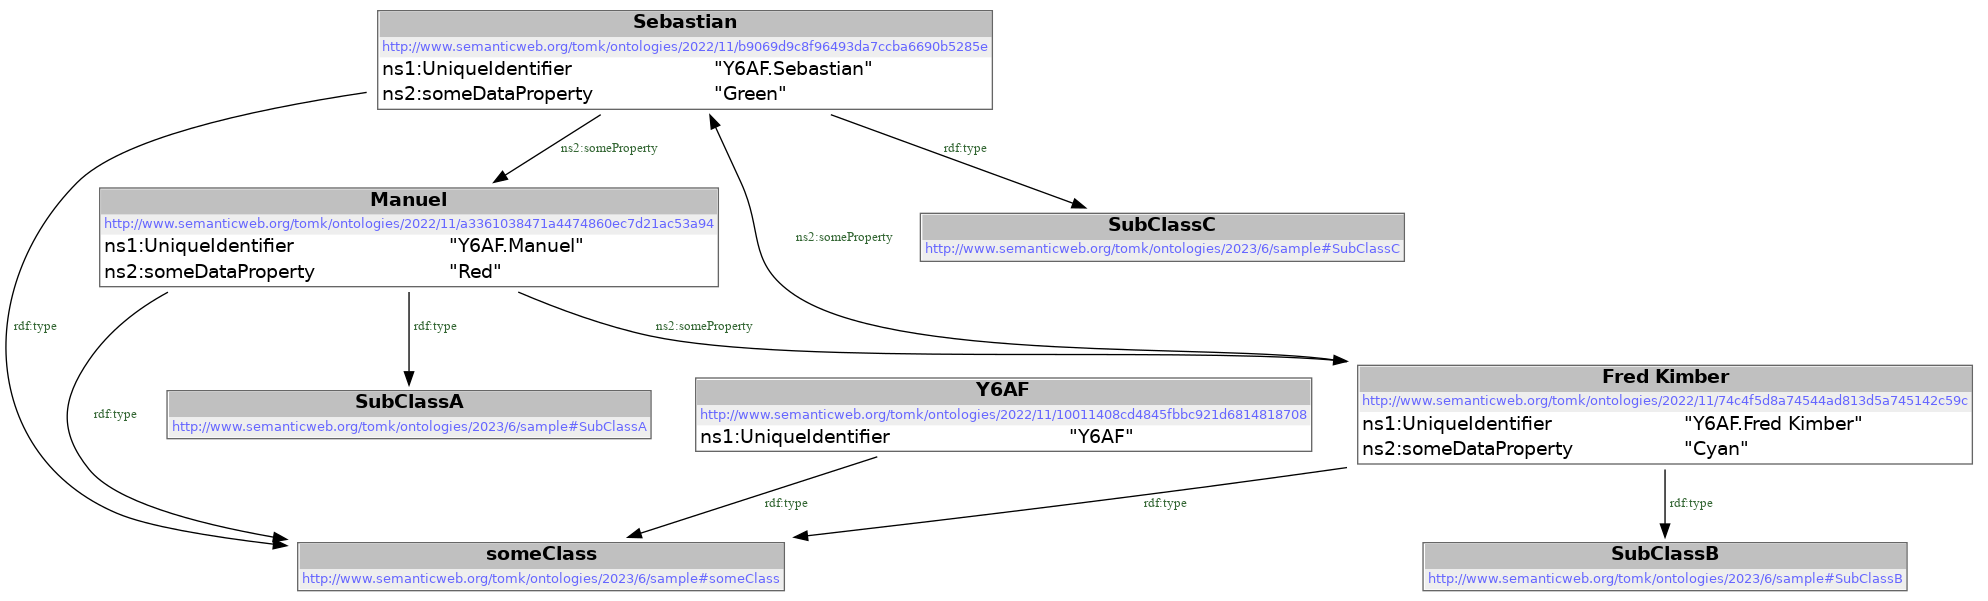

In [18]:
visualize(t2rdflibg(s1))

In [19]:
repo.register_serialization("../DMEAR_ser.rdf")

In [20]:
file_dtypes = {'ModelDomain': str,
 'Model': str,
 'ModelType': str,
 'Class': str,
 'ClassDescription': str,
 'Attribute': str,
 'AttributeDescription': str,
 'DataType': str,
 'Context': str,
 'SubContext': str,
 'Nulls': str,
 'IsPK': str,
 'Relationship': str,
 'FromClass': str,
 'FromAttribute': str,
 'FromCardinality': str,
 'ToClass': str,
 'ToAttribute': str,
 'ToCardinality': str}
mpd = {"created" : "2023-04-10", 
                   "creator" : "tomk", 
                   "description" : "Sample ERD model version 1", 
                   "title" : "inventory ERD", 
                   "modified" : "2023-04-10"}
metadata_payload = repo.meta_data_package_template( mpd )
title = "Inventory ERD v1.0"
model_data = pd.read_csv(r"../sample/inventory_v1.csv", index_col="Sequence", dtype=file_dtypes)
datarows = [dict({rk:get_field(rv) for rk, rv in r.items()}) for i,r in model_data.iterrows()]
repo.load_serialization_to_discourse("Data Model Entity Attribute Relation Serialization", mpd['title'], metadata_payload, datarows)

//////LOCATE1/////
0:00:00.018483 for 93 from 9
//////LOCATE2/////
self.members: 93
0:00:00.074974 for 1218 triples


In [21]:
datarows

[{'ModelDomain': 'Inventory',
  'Model': 'Simple ERD Model - Inventory',
  'ModelType': 'Physical',
  'Class': 'Product',
  'ClassDescription': 'Individual products and their descriptions',
  'Attribute': 'p_id',
  'AttributeDescription': 'Id field of the product by which it is coded',
  'DataType': 'integer',
  'Context': None,
  'SubContext': None,
  'Nulls': 'No',
  'IsPK': 'Yes',
  'Relationship': None,
  'FromClass': None,
  'FromAttribute': None,
  'FromCardinality': None,
  'ToClass': None,
  'ToAttribute': None,
  'ToCardinality': None},
 {'ModelDomain': 'Inventory',
  'Model': 'Simple ERD Model - Inventory',
  'ModelType': 'Physical',
  'Class': 'Product',
  'ClassDescription': 'Individual products and their descriptions',
  'Attribute': 'p_name',
  'AttributeDescription': 'Name of the product.',
  'DataType': 'string',
  'Context': None,
  'SubContext': None,
  'Nulls': 'No',
  'IsPK': 'No',
  'Relationship': None,
  'FromClass': None,
  'FromAttribute': None,
  'FromCardinal

In [22]:
repo.get_discourse_hashes()

[('af757787414b-921e-c7dc-fac68562cdb8',
  'http://www.semanticweb.org/tomk/ontologies/2022/11/e75a94ad060d4103a6700fa0132b585d'),
 ('4d561b399e64-c4e5-97ae-fe57e56c0022',
  'http://www.semanticweb.org/tomk/ontologies/2022/11/9ce5cc65604348728a63d38d6f0ba2a1')]

In [23]:
qr = repo.ds.query(discourse_details_sparql)
pd.DataFrame(qr)

,0,1,2,3,4,5,6,7,8
0,http://discourse,http://www.semanticweb.org/tomk/ontologies/202...,discourse_test3,test3,Test sample serialization,2023-08-17,af757787414b-921e-c7dc-fac68562cdb8,21,4
1,http://discourse,http://www.semanticweb.org/tomk/ontologies/202...,discourse_inventory ERD,inventory ERD,Sample ERD model version 1,2023-04-10,4d561b399e64-c4e5-97ae-fe57e56c0022,93,13


In [24]:
get_posits_sparql = sparql.replace("%%p1%%", URIRef(repo.get_discourse_hashes()[1][1]).n3())

get_posits_sparql

'PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\nPREFIX disco: <http://www.semanticweb.org/tomk/ontologies/2022/11/discourse#> \nPREFIX dcterms: <http://purl.org/dc/terms/> \nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> \n\nselect ?g ?discourse ?assertion ?refutation ?posit ?s ?p ?o\nWHERE {\n  GRAPH ?g\n  {\n      ?discourse a disco:Discourse.\n      ?discourse disco:DiscourseContains+ ?declaration .\n      ?declaration a disco:Declaration .\n        OPTIONAL { ?declaration disco:Asserts ?assertion. \n                   ?assertion disco:Subject ?s.\n                   ?assertion disco:Predicate ?p.\n                   ?assertion disco:Object ?o.\n                   }\n        OPTIONAL { ?declaration disco:Refutes ?refutation. \n                   ?refutation disco:Subject ?s.\n                   ?refutation disco:Predicate ?p.\n                   ?refutation disco:Object ?o.\n                   }\n        OPTIONAL { ?declaration disco:Posits ?posit. \n              

In [25]:

qr = repo.ds.query(get_posits_sparql)
results = list([{k:v[e] for e,k in enumerate([v.n3()[1:] for v in qr.vars])} for v in qr])
dcontents = pd.DataFrame(results)
set(dcontents['p'])


{rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#DataType'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Description'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromCardinality'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelType'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Optionality'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromAttribute'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromClass'),
 rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToAttribute')

digraph { 
 node [ fontname="DejaVu Sans" ] ; 
	node0 -> node2 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:Contains</font> > ] ;
	node5 -> node6 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node5 -> node8 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:Contains</font> > ] ;
	node9 -> node1 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:Contains</font> > ] ;
	node9 -> node4 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:Contains</font> > ] ;
	node8 -> node10 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:Contains</font> > ] ;
	node7 -> node1 [ color=BLACK, label=< <font point-size='10' color='#336633'>ns2:RelationshipFromAttribute</font> > ] ;
	node13 -> node14 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node3 -> node15 [ color=BLACK, label=< <font point-size='10' color='#336633'>rdf:type</font> > ] ;
	node7 -> node12 

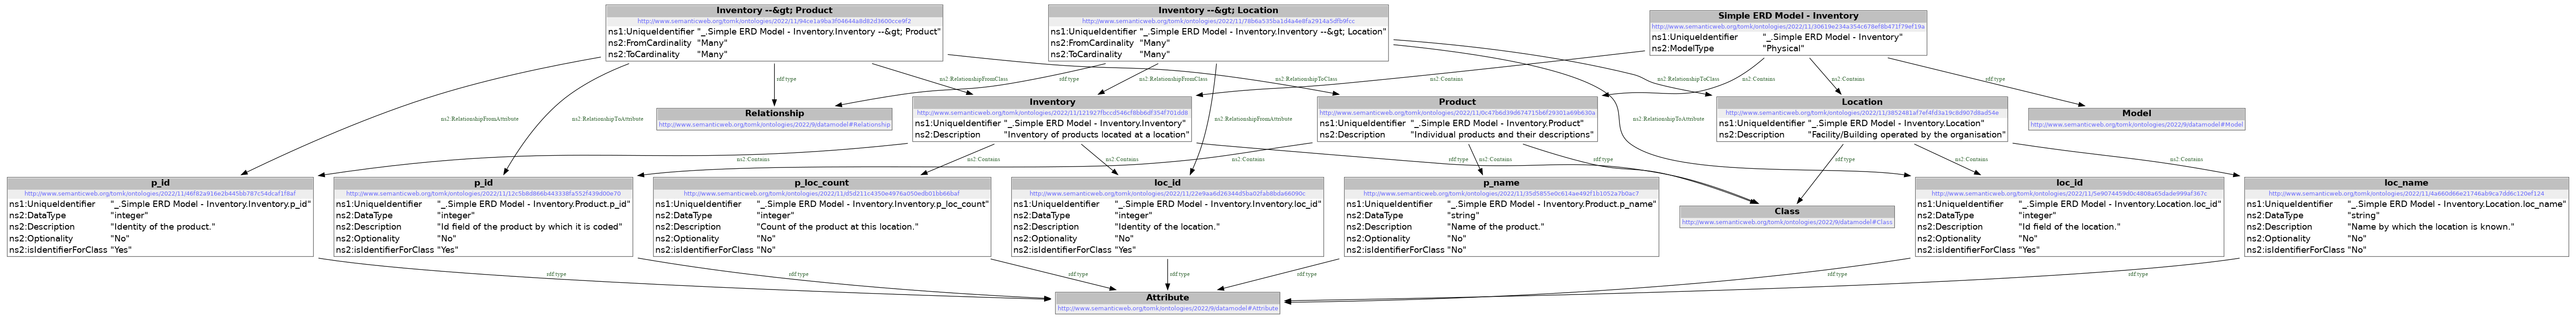

In [26]:

dcontents['triple'] = dcontents.apply(lambda x : tuple([x['s'], x['p'], x['o']]), axis=1)
dcd = dcontents.groupby(['discourse'])['triple'].agg(set).to_dict()
s1 = list(dcd.values())[0]
visualize(t2rdflibg(s1))

In [27]:
def typed_dictionary_from_triples(triple_set):
    type_d={}
    for t in triple_set:
        if t[1]==URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type"):
            if t[2] not in type_d.keys():
                type_d[t[2]]=set([t[0]])
            else:
                type_d[t[2]].add(t[0])
                
    return type_d


def diffset(S1, S2):
    # Given two input sets, s1 and s2, return the Left difference, Intersection and Right difference between them
    L = S1.difference(S2)
    I = S1.intersection(S2)
    R = S2.difference(S1)
    return L,I,R

def LIR_test(triple, LIR_tuple):
    for e,s in enumerate(LIR_tuple):
        if triple in s:
            return e
    return None
    

def property_per_entity(triple_set, entity):
    property_d={}
    for t in triple_set:
        if t[0] == entity:
            if t[1] not in property_d.keys():
                property_d[t[1]]=set([t[2]])
            else:
                property_d[t[1]].add(t[2])
    return property_d

def retrieve_property_meta(triple_set, LIR_tuple, subject, predicate):
    meta_collection=[]
    for s,p,o in triple_set:
        if s==subject and p==predicate:
            LIR_loc=LIR_test((s,p,o), LIR_tuple)
            meta_collection.append((LIR_loc, o))
    return meta_collection
            
    
    

In [36]:
def DMEAR_vizdiff(S1, S2):
    rdf_type_uri = URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type")
    class_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class')
    relation_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Relationship')
    attribute_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute')
    L, I, R = diffset(S1, S2)
    obj_dict = typed_dictionary_from_triples(S1.union(S2))
    entities=[]
    DMEAR_types = [ URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Model'), 
                    URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Class'),
                    URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute'), 
                    URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Relationship')
                    ]
    for entity in obj_dict[class_uri]:
        def_triple = (entity, rdf_type_uri, class_uri)
        LIR_loc = LIR_test(def_triple, (L,I,R))
        eprops = property_per_entity(S1.union(S2), entity)
        unique_ids = retrieve_property_meta(S1.union(S2), (L,I,R), entity, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'))
        labels = retrieve_property_meta(S1.union(S2), (L,I,R), entity, URIRef('http://www.w3.org/2000/01/rdf-schema#label'))
        descriptions = retrieve_property_meta(S1.union(S2), (L,I,R), entity, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Description'))
        content_elements = retrieve_property_meta(S1.union(S2), (L,I,R), entity, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains'))
        # possible filter on content_elements having type-assignments of Attribute
        attr_elements = []
        for a_lir, attribute in content_elements:
            aprops = property_per_entity(S1.union(S2), attribute)
            a_labels = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.w3.org/2000/01/rdf-schema#label'))
            a_descs = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Description'))
            a_dtypes = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#DataType'))
            a_uniques = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'))
            a_optionalities = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Optionality'))
            a_pks = retrieve_property_meta(S1.union(S2), (L,I,R), attribute, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#isIdentifierForClass'))
            attribute_package = (attribute, a_lir, a_uniques, a_labels, a_descs, a_optionalities, a_pks)
            attr_elements.append(attribute_package)
        entities.append((entity, LIR_loc, unique_ids, labels, descriptions, attr_elements))
    relations=[]
    for relation in obj_dict[relation_uri]:
        print(relation)
        rel_triple = (relation, rdf_type_uri, relation_uri)
        rel_lir = LIR_test(rel_triple, (L,I,R))
        rel_props = property_per_entity(S1.union(S2), relation)
        for k in rel_props.keys():
            print (k)
        rel_from_class = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromClass'))
        rel_to_class = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToClass'))
        rel_from_cardinality = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromCardinality'))
        rel_to_cardinality = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToCardinality'))
        rel_from_attribute = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromAttribute'))
        rel_to_attribute = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToAttribute'))
        rel_unique = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'))
        rel_label = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.w3.org/2000/01/rdf-schema#label'))
        rel_type = retrieve_property_meta(S1.union(S2), (L,I,R), relation, URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'))
        rel_package = (relation, rel_lir, 
                       rel_unique, rel_label, 
                       rel_from_class, rel_to_class, 
                       rel_from_attribute, rel_to_attribute, 
                       rel_from_cardinality, rel_to_cardinality,
                       rel_type)
        
        relations.append(rel_package)
    
    
    return entities, relations

In [40]:
list(DMEAR_vizdiff(s1, s1))[1]

http://www.semanticweb.org/tomk/ontologies/2022/11/94ce1a9ba3f04644a8d82d3600cce9f2
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromCardinality
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToClass
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ToCardinality
http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipToAttribute
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromAttribute
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromClass
http://www.w3.org/2000/01/rdf-schema#label
http://www.semanticweb.org/tomk/ontologies/2022/11/78b6a535ba1d4a4e8fa2914a5dfb9fcc
http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromAttribute
http://ww

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/94ce1a9ba3f04644a8d82d3600cce9f2'),
  1,
  [(1,
    rdflib.term.Literal('_.Simple ERD Model - Inventory.Inventory --&gt; Product'))],
  [(1, rdflib.term.Literal('Inventory --&gt; Product'))],
  [(1,
    rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/121927fbccd546cf8bb6df354f701dd8'))],
  [(1,
    rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/0c47b6d39d674715b6f29301a69b630a'))],
  [(1,
    rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/46f82a916e2b445bb787c54dcaf1f8af'))],
  [(1,
    rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/12c5b8d866b443338fa552f439d00e70'))],
  [],
  [],
  [(1,
    rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Relationship'))]),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/78b6a535ba1d4a4e8fa2914a5dfb9fcc'),
  1,
  [(1,
    rdflib.t